# Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
from scipy.io import arff
import statsmodels.api as sm

def make_dummy_data():
    X, y = make_regression(n_samples=100, n_features=5, n_informative=4,
                            random_state=42, shuffle=False)

    data = data=np.hstack([X, y.reshape(-1, 1)])
    columns = ['x'+str(i) for i in range(X.shape[1])] + ['y']
    return pd.DataFrame(data, columns = columns)

def make_dummy_data():
    df = sm.datasets.macrodata.load_pandas().data
    df = df.rename(columns = {'realgdp':'y'})
    return df

def load_real_data():
    df = pd.read_csv('dataset.csv', sep=';')
    df = df.replace([np.inf, -np.inf], np.nan)
    
    df = df.loc[df.AOI == 'New York']
    df['Date'] = pd.to_datetime(df.Date, format='%Y%m%d')
    df = df.sort_values(by='Date')
    
    df = df.set_index(df.Date)
    
    df = df.fillna(method='pad')
    
    df = df.drop(['AOI', 'Date'], axis=1)
    df = df.rename(columns = {'Gt':'y'})
    df['y'] = df['y'].diff()
    df['y'] = df['y'].fillna(0)
    
    return df

def split_data(df, val_days, test_days):
    df_train = df.iloc[:-val_days-test_days]
    df_val = df.iloc[-val_days-test_days:-test_days]
    df_test = df.iloc[-test_days:]
    return df_train, df_val, df_test

In [2]:
df_raw = load_real_data()
df_raw

,no2Mean,no2Std,no2Min,no2Max,no2Median,ozoneMean,ozoneStd,ozoneMin,ozoneMax,ozoneMedian,aerosolMean,aerosolStd,aerosolMin,aerosolMax,aerosolMedian,y
Date,,,,,,,,,,,,,,,,
2020-01-01,3.268277e+15,2.347433e+14,2.770049e+15,4.098712e+15,3.254856e+15,271.662323,2.719894,267.750183,276.593414,271.690765,-17695.110000,16360.099052,-32767.0,562.6,-32767.0,0.0
2020-01-02,-9.161657e+29,2.347433e+14,-1.267651e+30,3.895868e+15,-1.267651e+30,263.036316,0.581973,262.159790,264.010529,263.121613,-32767.000000,0.000000,-32767.0,-32767.0,-32767.0,0.0
2020-01-03,3.499875e+15,2.676245e+14,2.454280e+15,4.172913e+15,3.532181e+15,270.459930,5.020619,262.469543,278.715027,270.643097,-27541.916364,12012.829451,-32767.0,109.8,-32767.0,0.0
2020-01-04,-5.762048e+28,2.676245e+14,-1.267651e+30,4.351038e+15,3.520816e+15,299.209320,3.918550,288.263519,303.666992,299.326477,-31847.647273,5490.521369,-32767.0,1005.6,-32767.0,0.0
2020-01-05,-2.362440e+29,2.676245e+14,-1.267651e+30,4.132933e+15,3.432682e+15,294.446960,3.960938,287.750519,301.881287,294.541656,-31077.003636,7366.631911,-32767.0,1251.2,-32767.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25,-9.161657e+29,4.230040e+14,-1.267651e+30,3.327806e+15,-1.267651e+30,234.124115,3.289183,229.640137,240.644745,233.172775,-31987.730909,5111.116358,-32767.0,2097.0,-32767.0,1249.0
2020-05-26,2.211548e+15,3.238107e+14,1.494571e+15,3.105336e+15,2.183755e+15,258.290070,7.432646,248.189468,271.832306,257.189850,-32616.359091,2229.281876,-32767.0,374.0,-32767.0,1072.0
2020-05-27,-5.762048e+28,3.238107e+14,-1.267651e+30,4.038438e+15,1.971043e+15,289.007690,6.273417,281.089294,303.935699,287.307922,-29465.884545,9903.542471,-32767.0,731.2,-32767.0,1129.0


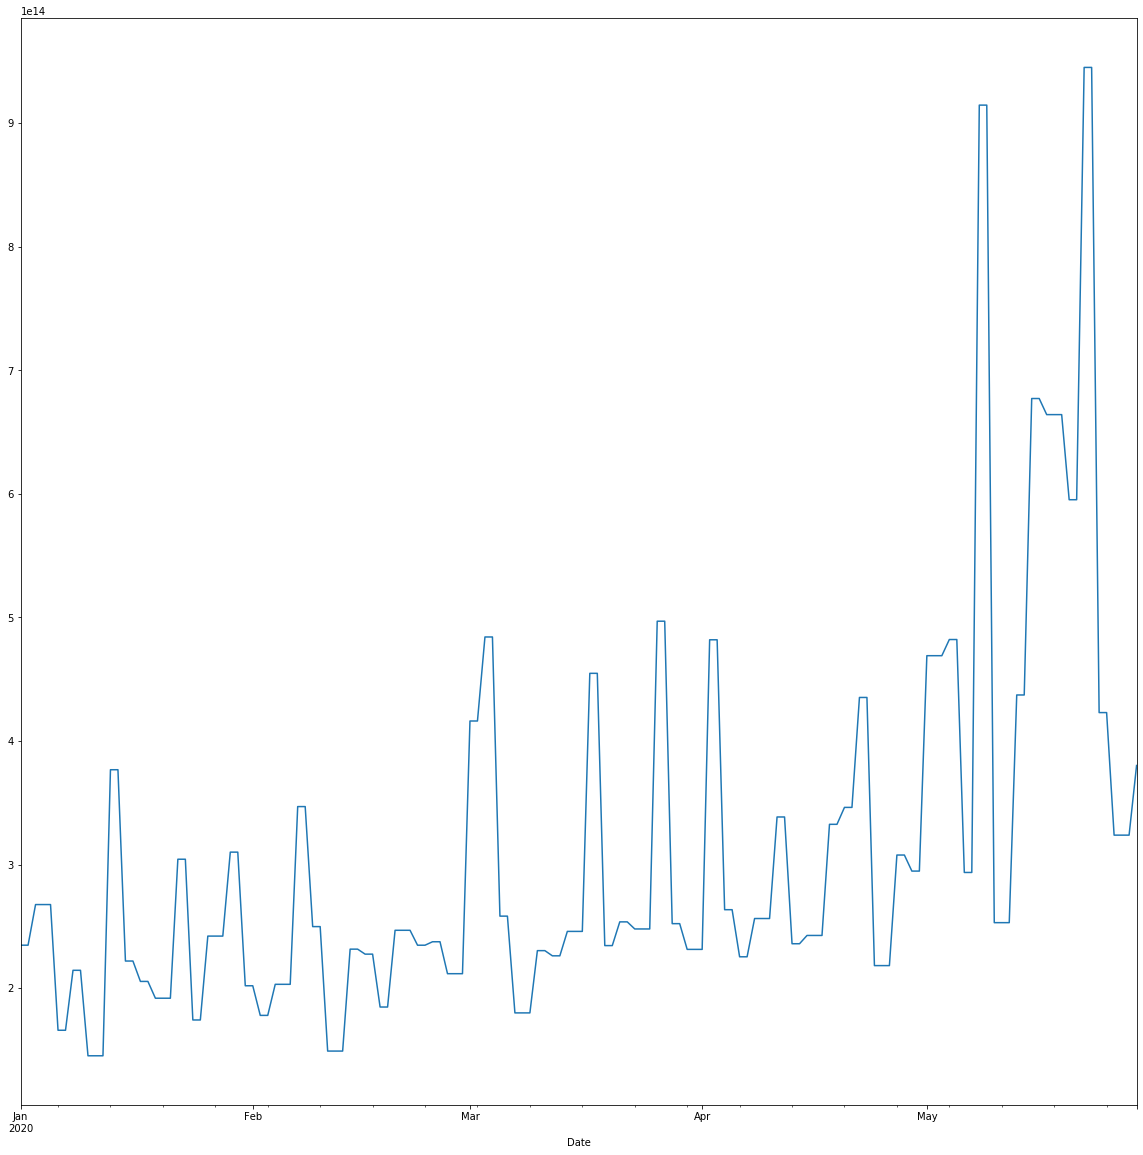

In [3]:
df_raw['no2Std'].plot(figsize=(20,20))

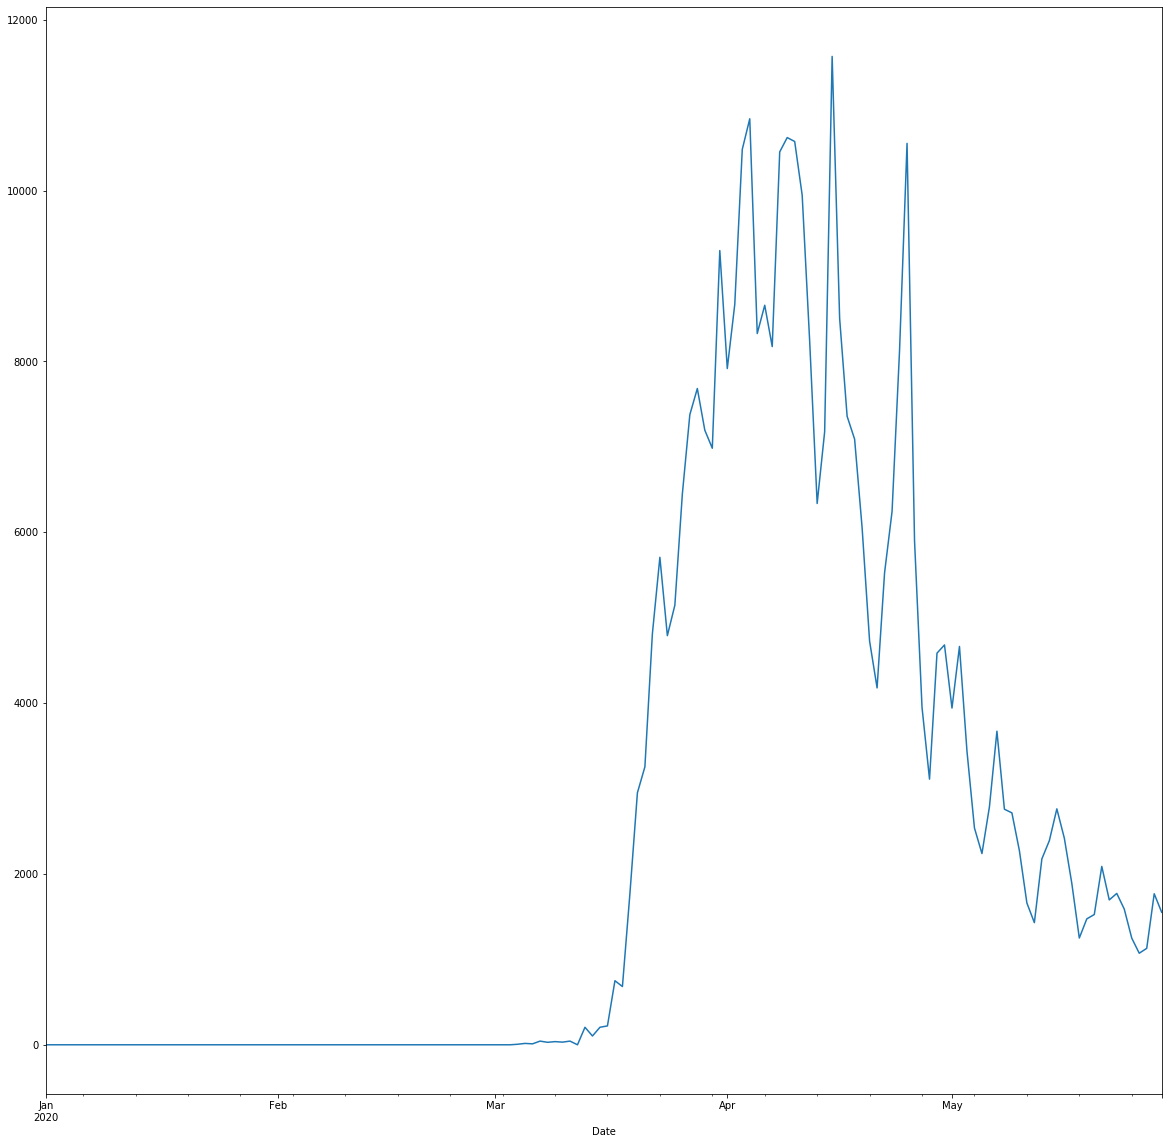

In [4]:
df_raw['y'].plot(figsize=(20,20))

In [5]:
def get_data_in_window(raw_df, t0, window_size):
    columns = list(raw_df.columns)
    columns.remove('y')
    t_columns = []
    x_t = []
    for dt in range(window_size):
        t_columns.append(['t-{}_{}'.format(dt, col_name) for col_name in columns])
        x_t.append(raw_df.drop('y', axis=1).iloc[t0-dt].values)
        
    x = np.concatenate(x_t)
    y = raw_df['y'].iloc[t0]
    data = np.hstack([x, y]).reshape(1, -1)
    columns = [item for sublist in t_columns for item in sublist] + ['y']
    return pd.DataFrame(data, columns=columns)

def format_windowed_data(raw_df, t_start, t_end, window_size):
    data = []
    for t in range(t_start, t_end):
        df_x_t = get_data_in_window(raw_df, t, window_size)
        x_t = df_x_t.values.ravel()
        columns = df_x_t.columns
        data.append(x_t)
    return pd.DataFrame(data, columns=columns)

In [6]:
n = len(df_raw)

df_train_lstm = df_raw.iloc[:n-7-7]
df_val_lstm = df_raw.iloc[n-7-7:n-7]
df_test_lstm = df_raw.iloc[n-7:n]

df_train_classical = format_windowed_data(df_raw, 13, n-7-7, window_size=14)
df_val_classical = format_windowed_data(df_raw, n-7-7, n-7, window_size=14)
df_test_classical = format_windowed_data(df_raw, n-7, n, window_size=14)

In [7]:
df_test_classical.describe()

,t-0_no2Mean,t-0_no2Std,t-0_no2Min,t-0_no2Max,t-0_no2Median,t-0_ozoneMean,t-0_ozoneStd,t-0_ozoneMin,t-0_ozoneMax,t-0_ozoneMedian,...,t-13_ozoneStd,t-13_ozoneMin,t-13_ozoneMax,t-13_ozoneMedian,t-13_aerosolMean,t-13_aerosolStd,t-13_aerosolMin,t-13_aerosolMax,t-13_aerosolMedian,y
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.0,7.000000
mean,-3.514849e+29,4.489743e+14,-7.243718e+29,3.567133e+15,-3.621859e+29,234.655186,5.274558,226.601517,243.687256,234.615291,...,2.742682,245.374490,254.877801,249.082225,-32246.502338,2934.735502,-32767.0,-13458.200000,-32767.0,1447.142857
std,5.140509e+29,2.233457e+14,6.775877e+29,4.853463e+14,6.185502e+29,111.979131,3.056788,107.726257,116.289889,112.271843,...,1.720319,15.319371,15.835404,14.318352,704.093125,3071.029857,0.0,18070.700515,0.0,294.561498
min,-1.244602e+30,3.238107e+14,-1.267651e+30,3.105336e+15,-1.267651e+30,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.785013,218.610611,229.084488,221.686508,-32767.000000,0.000000,-32767.0,-32767.000000,-32767.0,1072.000000
25%,-5.790859e+29,3.238107e+14,-1.267651e+30,3.232575e+15,-6.338253e+29,239.904251,3.497008,234.598450,245.627213,240.061523,...,1.277514,237.150467,246.649109,243.144897,-32767.000000,0.000000,-32767.0,-32767.000000,-32767.0,1189.000000
50%,-5.762048e+28,3.801975e+14,-1.267651e+30,3.394154e+15,1.971043e+15,253.631866,6.273417,240.858124,265.476288,253.500671,...,2.939173,253.063263,259.443726,256.930023,-32466.598182,3136.287058,-32767.0,277.200000,-32767.0,1551.000000
75%,1.988431e+15,4.230040e+14,8.834647e+14,3.798960e+15,2.097026e+15,273.648880,7.664479,264.639381,287.884003,272.248886,...,3.760535,256.181618,261.536072,258.241898,-32068.801818,4819.312419,-32767.0,829.800000,-32767.0,1678.500000
max,2.212867e+15,9.451827e+14,1.494571e+15,4.407374e+15,2.183755e+15,361.848175,8.325516,346.876831,373.312073,364.185547,...,5.398492,259.283386,279.246033,262.185455,-30820.314545,7768.236616,-32767.0,2156.800000,-32767.0,1772.000000


# Visualize Data

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as grids
import matplotlib.font_manager as mtfm
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA

def plot_distributions(dataset, features_to_plot, title="Dataset Distribution",
                        logx=False,featlog=[],colorhist="y",colorline="k"):
    if len(features_to_plot)==2:
        gs = grids.GridSpec(1,2)
        plt.figure(figsize=(25,10))
    else:
        plt.figure(figsize=(25,20))
        gs = grids.GridSpec(3,3)   
    for i, feature in enumerate(features_to_plot):
        ax = plt.subplot(gs[i])
        sns.distplot(dataset[feature], color=colorhist,
              kde_kws={"color": colorline,
                       "lw": 3,
                       "label": "KDE"})
        if logx==True:
            if feature in featlog:
                ax.set_xlabel('log('+str(feature)+')', size=20)
            else:
                ax.set_xlabel(xlabel=feature, size=20)
        else:
            ax.set_xlabel(xlabel=feature, size=20)
        plt.grid(linestyle='--')
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.legend(prop = mtfm.FontProperties(size=15))
        plt.suptitle(title,size=25)

def plot_scatter_matrix(dataframe, colors):
    plt.figure()
    axs = scatter_matrix(dataframe, figsize=(20,20), c=colors)
    n = len(dataframe.columns)
    for x in range(n):
        for y in range(n):
            ax = axs[x, y] # to get the axis of subplots
            ax.xaxis.label.set_rotation(90) # to make x axis name vertical  
            ax.yaxis.label.set_rotation(0) # to make y axis name horizontal 
            ax.yaxis.labelpad = 80 # to make sure y axis names are outside the plot area
    plt.show()
    
    
def plot_correlation_matrix(dataframe):           
    
    plt.figure(figsize=(14,13))
    
    ax = sns.heatmap(dataframe, annot=True, vmin=-1, vmax=1, fmt=".1f", square=True, cmap="RdBu", linewidths=0.5)

    labels = dataframe.columns
    ax.set_xticklabels(labels, fontsize = 8, rotation=90, ha='center', minor=False)
    ax.set_yticklabels(labels, fontsize = 8, rotation=0)
    ax.set_xticks(np.arange(dataframe.shape[0]) + 0.5, minor=False)
    ax.set_yticks(np.arange(dataframe.shape[0]) + 0.5, minor=False)
    
    plt.title('Correlation Matrix')
    plt.show()


def plot_pca(dataframe, colors=None, scree_plot=True, loading_plot=False):
    pca = PCA(n_components=len(dataframe.columns))
    principal_components = pca.fit_transform(dataframe)
 
    plt.figure(figsize=(12,12))
    plt.scatter(principal_components[:,0], principal_components[:,1], c=colors, marker='.', alpha=0.1)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA')
    plt.show()
    
    if scree_plot:
        var= pca.explained_variance_ratio_*100 #The amount of variance that each PC explains
        cum_var=np.cumsum(pca.explained_variance_ratio_)*100 #Cumulative Variance explains
        
        # Plot explained variance
        plt.figure(figsize=(12,6))
        plt.bar(range(len(dataframe.columns)), var, fill=False)
        plt.plot(var, color='blue', label='per component')
        plt.scatter(range(len(dataframe.columns)), var, color='blue')
        for i, value in enumerate(var):
            plt.annotate(str(round(value,2))+'%', xy=(i, value), horizontalalignment='center', verticalalignment='bottom')
        
        # Plot cummulative explained variance
        plt.plot(cum_var, color='orange', label='cumulative')
        plt.scatter(range(len(dataframe.columns)), cum_var, color='orange')
        for i, value in enumerate(cum_var):
            plt.annotate(str(round(value,2))+'%', xy=(i, value), horizontalalignment='center', verticalalignment='bottom')

        plt.xlabel('Principal Component')
        plt.ylabel('Explained Variance (%)')
        plt.title('Scree Plot')
        plt.legend()
        plt.show()
    
    if loading_plot:
        # TODO implement loading plot
        pass

#### Distributions

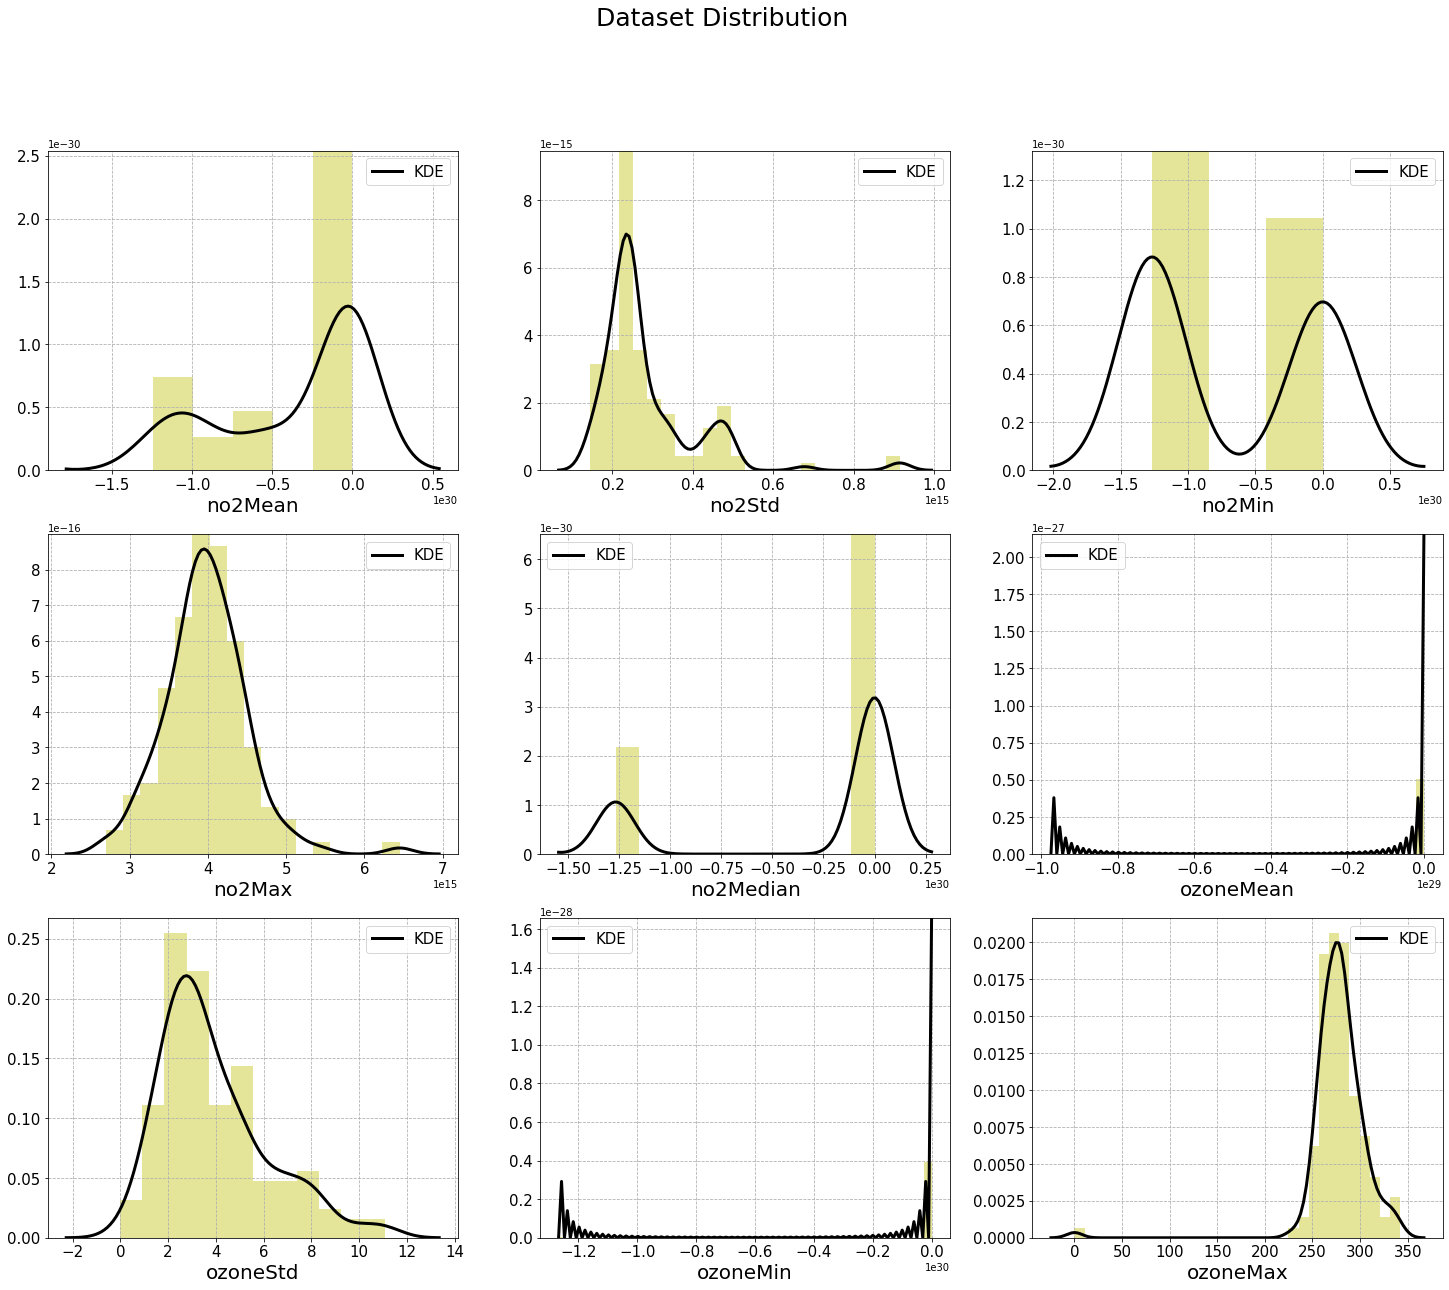

In [9]:
plot_distributions(df_train_lstm, features_to_plot=df_train_lstm.columns[:9])

/opt/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/envs/ml/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


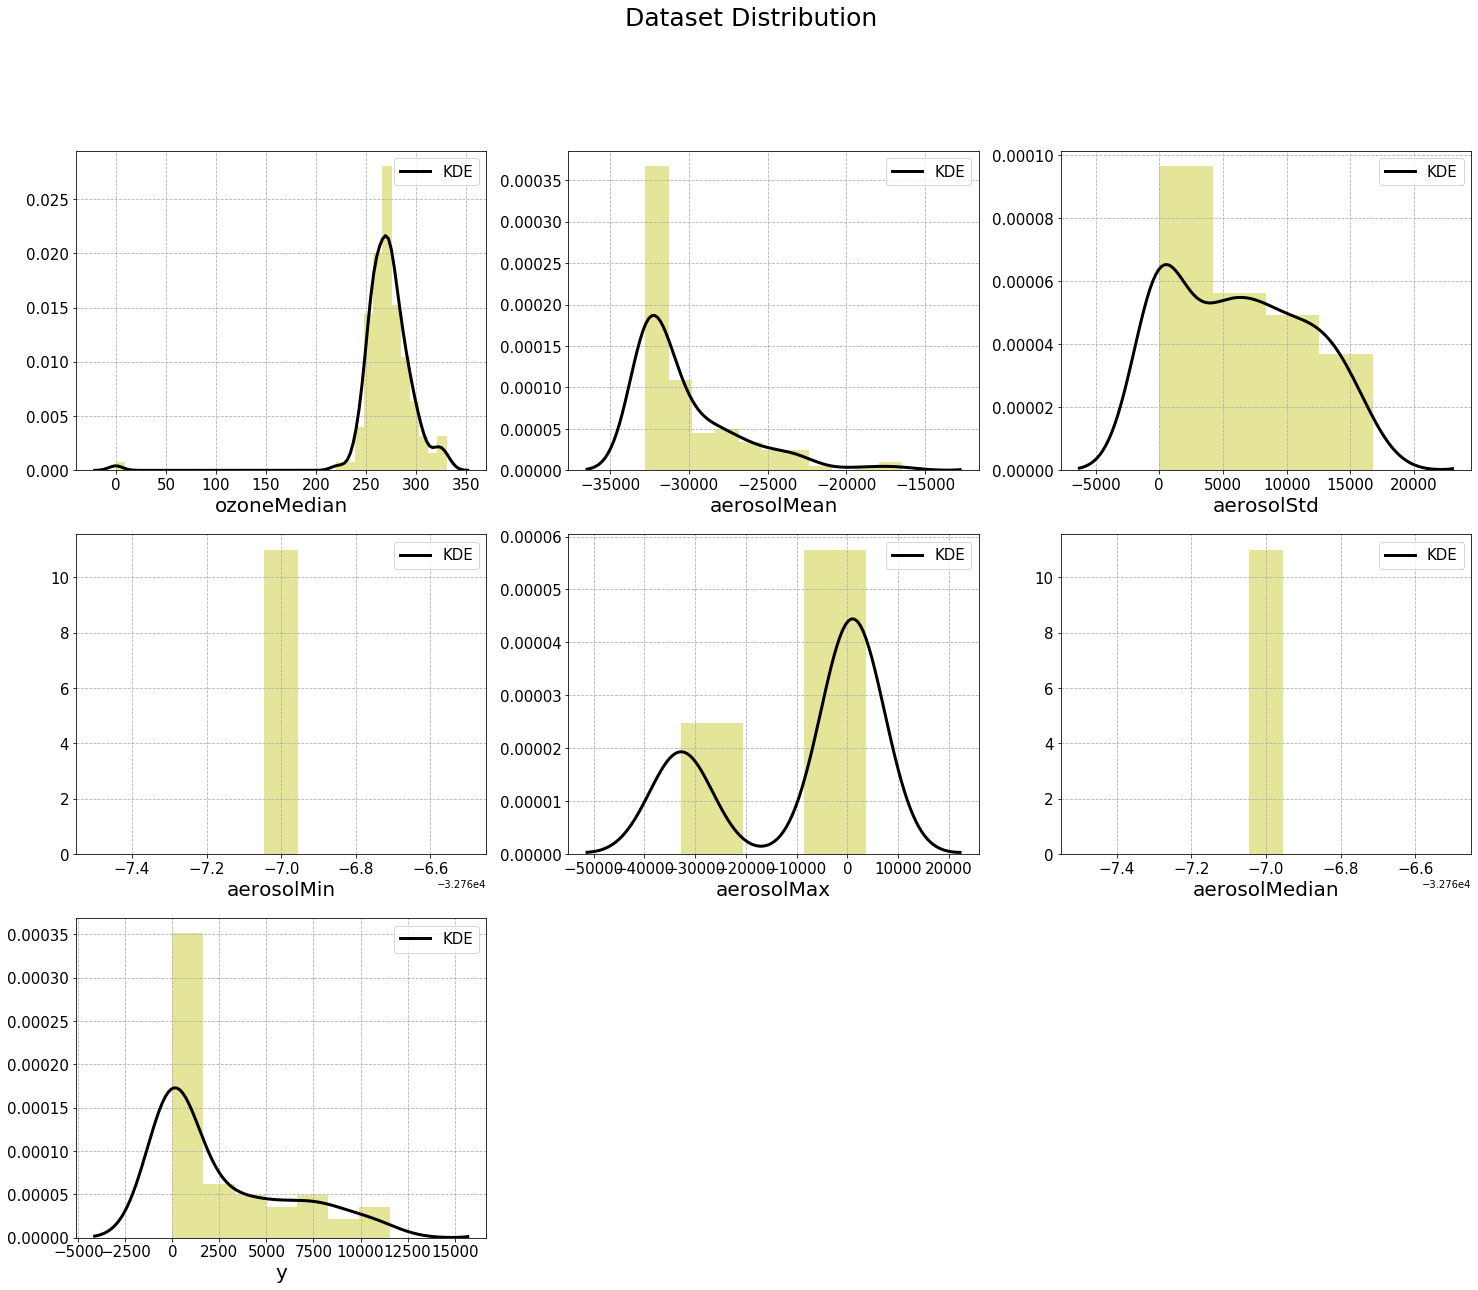

In [10]:
plot_distributions(df_train_lstm, features_to_plot=df_train_lstm.columns[9:18])

#### Scatter Matrix

/opt/anaconda3/envs/ml/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == -32767.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/anaconda3/envs/ml/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == -32767.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/anaconda3/envs/ml/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == -32767.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


<Figure size 432x288 with 0 Axes>

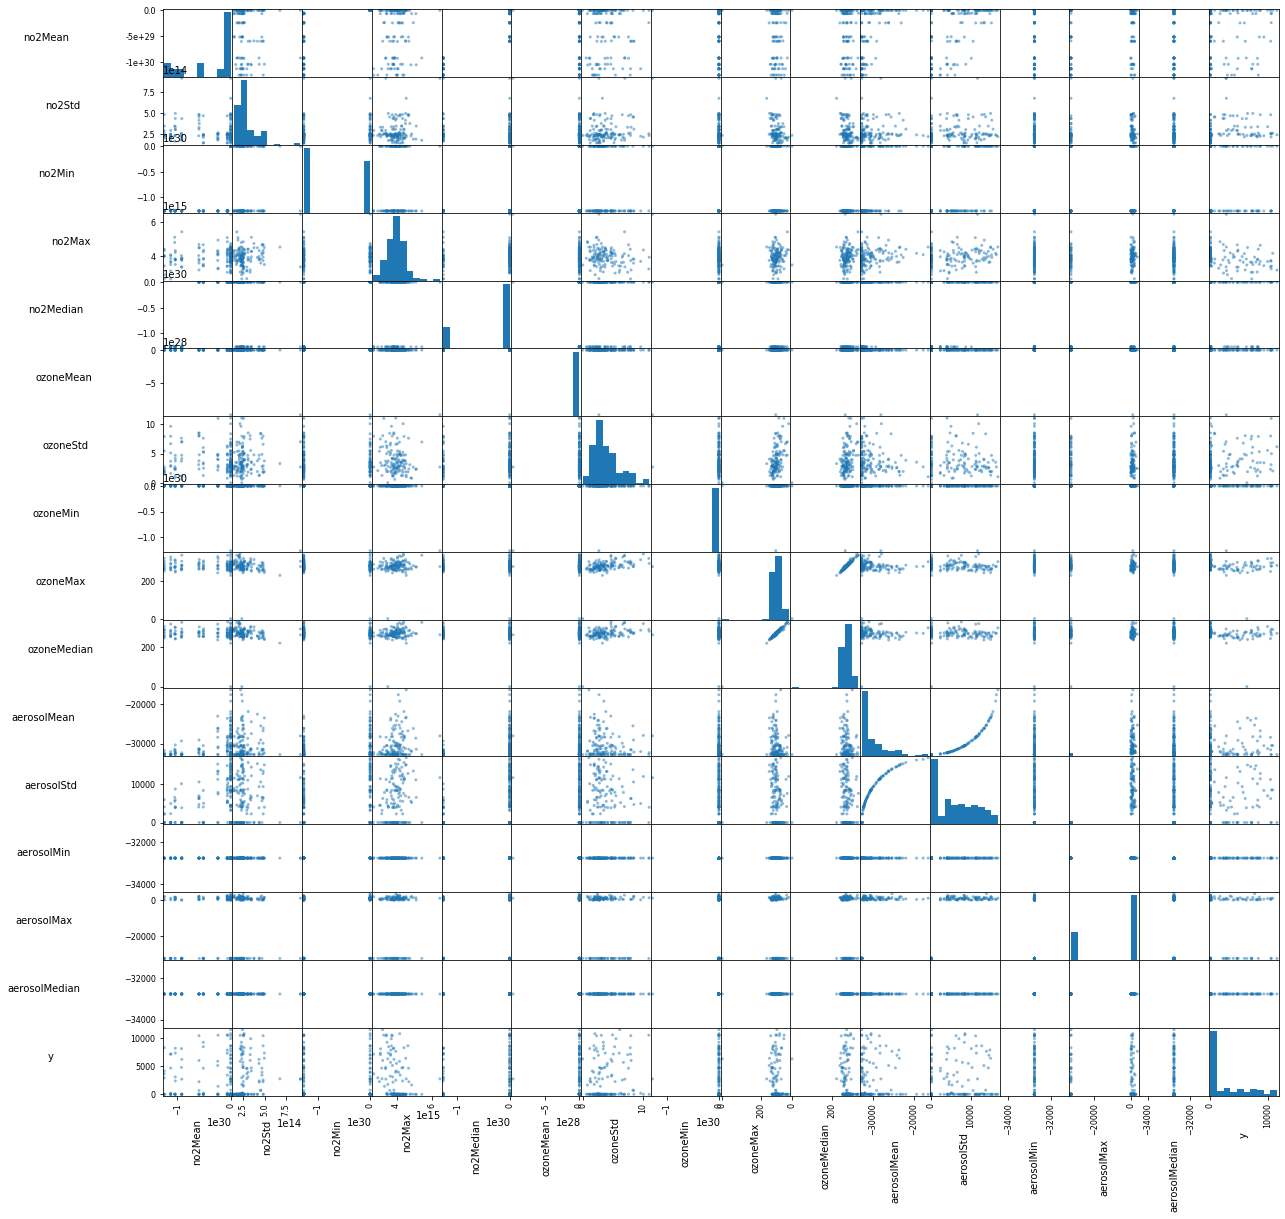

In [11]:
plot_scatter_matrix(df_train_lstm, None)

#### Correlation Matrix

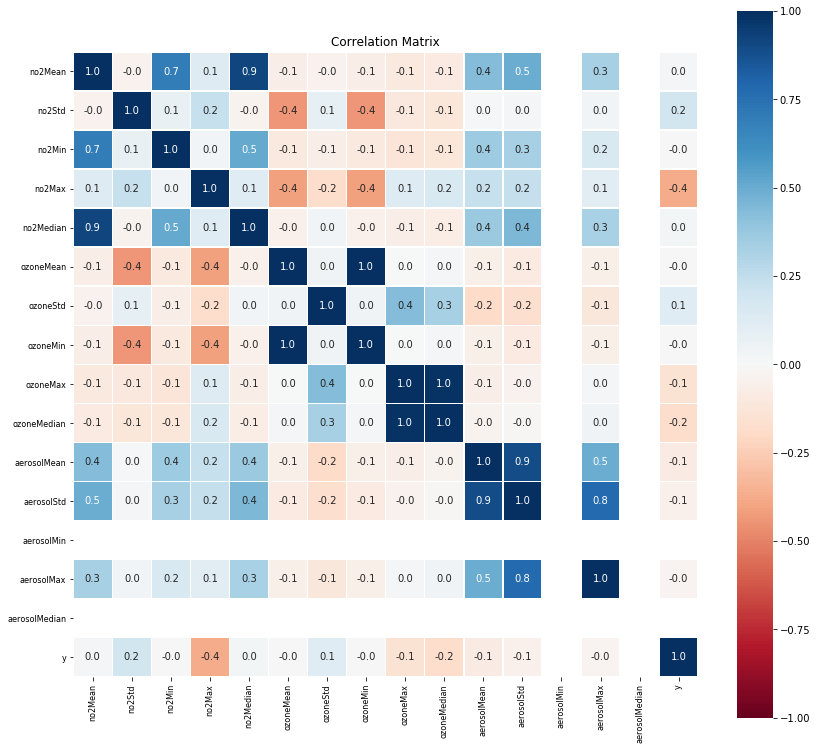

In [12]:
plot_correlation_matrix(df_train_lstm.corr())

#### PCA

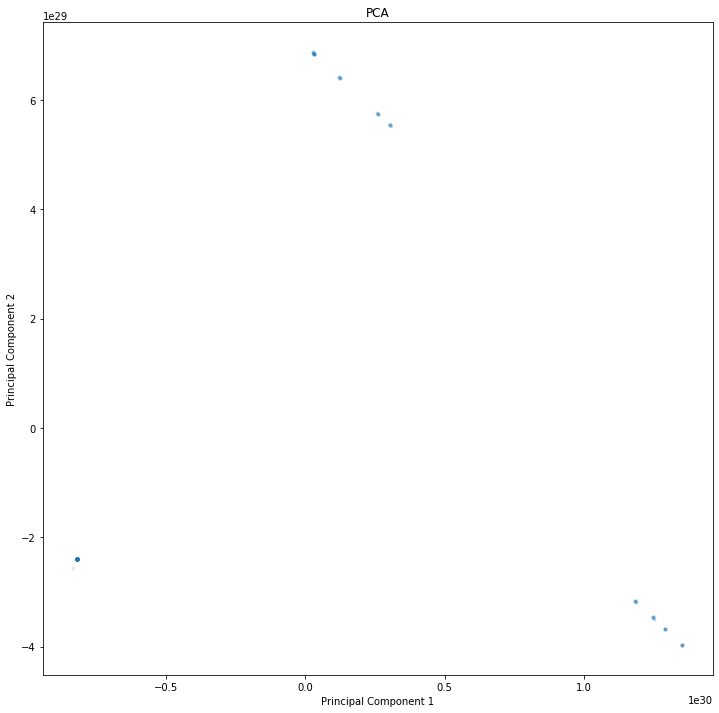

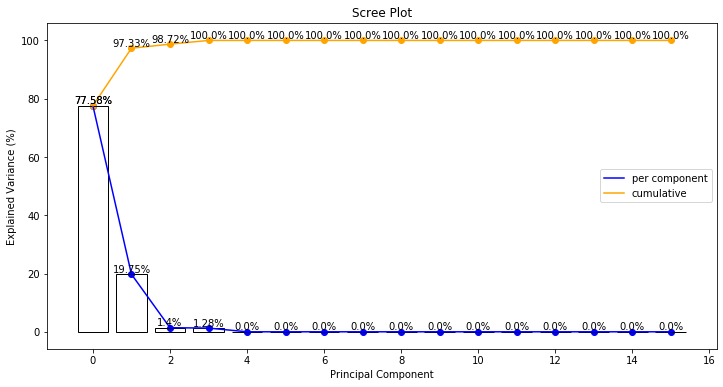

In [13]:
plot_pca(df_train_lstm)

#### UMAP

In [14]:
import umap

reducer = umap.UMAP(init="random", n_neighbors=10, random_state=42)
embedding = reducer.fit_transform(df_train_lstm)

/opt/anaconda3/envs/ml/lib/python3.7/site-packages/umap/spectral.py:4: NumbaDeprecationWarning: No direct replacement for 'numba.targets' available. Visit https://gitter.im/numba/numba-dev to request help. Thanks!
  import numba.targets
/opt/anaconda3/envs/ml/lib/python3.7/site-packages/umap/umap_.py:1023: RuntimeWarning: invalid value encountered in less
  graph.data[graph.data < (graph.data.max() / float(n_epochs))] = 0.0
/opt/anaconda3/envs/ml/lib/python3.7/site-packages/umap/umap_.py:905: RuntimeWarning: invalid value encountered in greater
  result[n_samples > 0] = float(n_epochs) / n_samples[n_samples > 0]


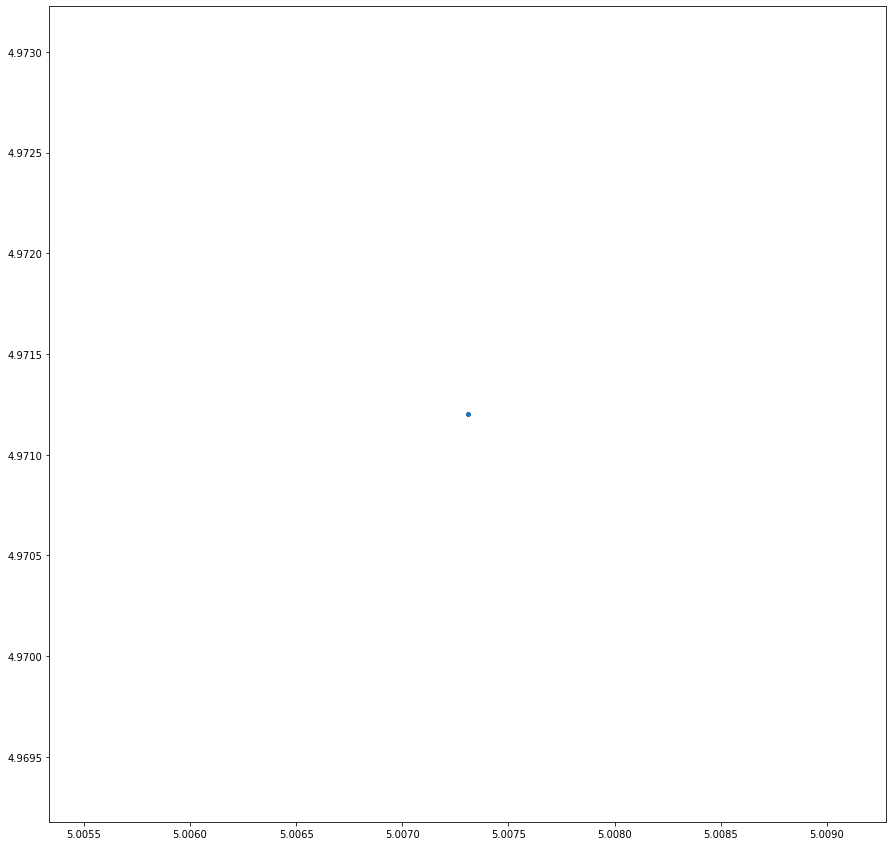

In [15]:
plt.figure(figsize=(15,15))
plt.scatter(embedding[:,0], embedding[:,1], marker='.', alpha=0.5)
plt.show()

# Data Normalization

In [33]:
from sklearn.preprocessing import StandardScaler

X_train, y_train = df_train_classical.drop('y', axis=1).values, df_train_classical['y'].values

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Training

#### Classical Model

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

#model = RandomForestRegressor(random_state=42)
model = GradientBoostingRegressor(random_state=42)
#model = LinearRegression()
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=42, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [35]:
import math

def r_squared(y_true, y_pred):
    pass

def mae(y_true, y_pred):
    abs_errors = [math.fabs(x - y) for x, y in zip(y_true, y_pred)]
    return np.mean(np.array(abs_errors))

def mse(y_true, y_pred):
    pass

def mape(y_true, y_pred):
    pass

In [36]:
X_val, y_val = df_val_classical.drop('y', axis=1).values, df_val_classical['y'].values
X_val = scaler.transform(X_val)

y_val_pred = model.predict(X_val)
performance = mae(y_val, y_val_pred)
print(performance)

3458.348892875418


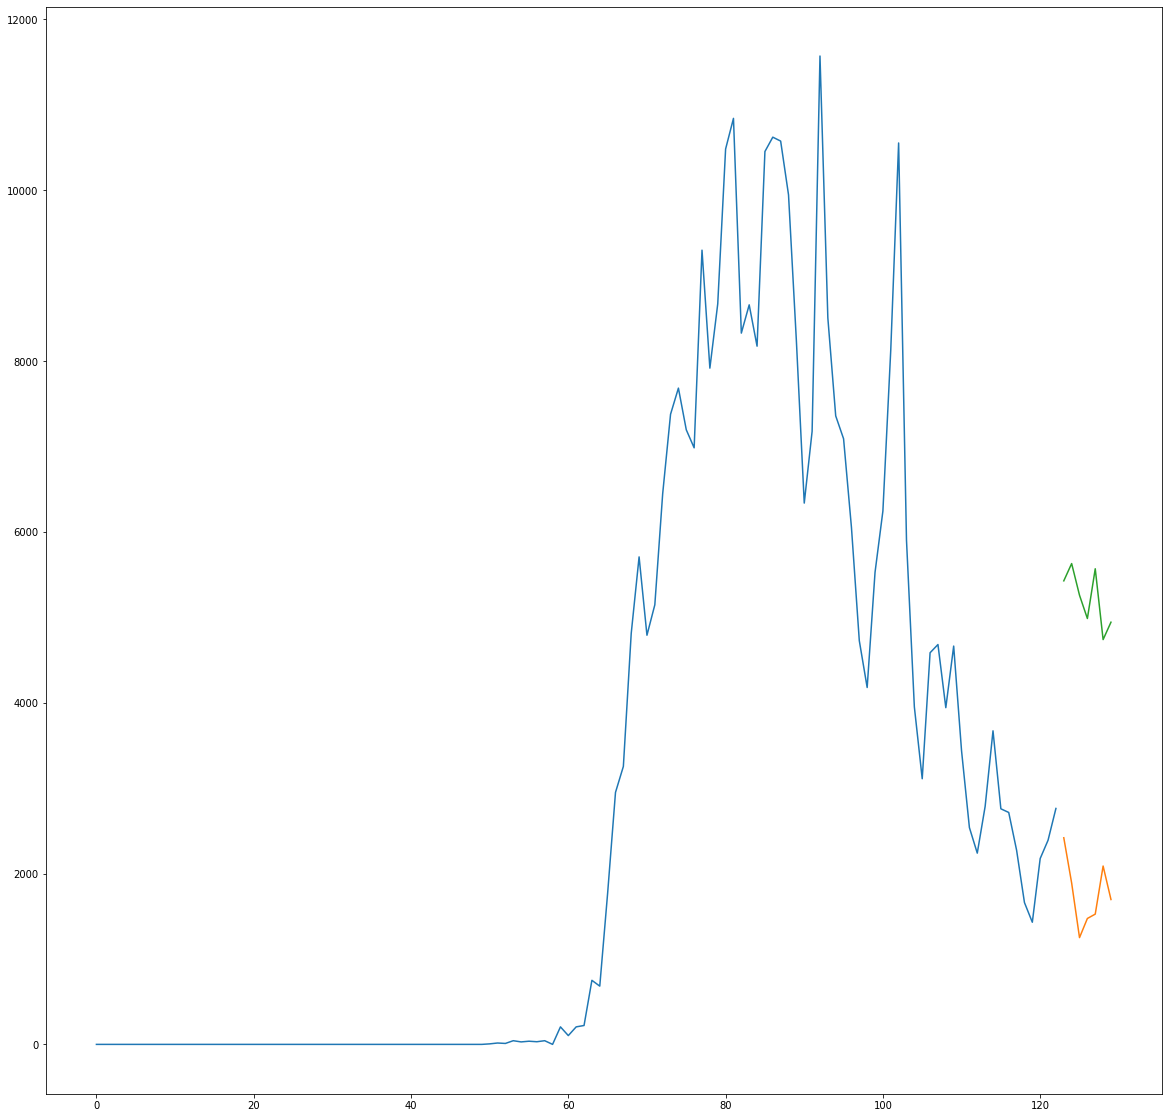

In [37]:
plt.figure(figsize=(20,20))
plt.plot(np.arange(y_train.shape[0]), y_train)
plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+7), y_val)
plt.plot(np.arange(y_train.shape[0], y_train.shape[0]+7), y_val_pred)
plt.show()

#### LSTM

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(42)

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTMModel, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # Building your LSTM
        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()

        # 28 time steps
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 28, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out
    
X_train = np.expand_dims(df_train_lstm.drop('y', axis=1).values, axis=0)
y_train = np.expand_dims(df_train_lstm['y'].values, axis=0)

input_dim = len(df_train_lstm.columns)-1
hidden_dim = 100
layer_dim = 1
output_dim = y_train.shape[-1]

lstm = LSTMModel(input_dim, hidden_dim, layer_dim, output_dim)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(lstm.parameters(), lr=0.1)

epochs = 100
X_train, y_train = torch.Tensor(X_train), torch.Tensor(y_train)
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = lstm(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print('loss:', float(loss))

loss: 18391958.0
loss: 16841712.0
loss: 15422137.0
loss: 14122216.0
loss: 12931864.0
loss: 11841847.0
loss: 10843706.0
loss: 9929697.0
loss: 9092730.0
loss: 8326310.0
loss: 7624491.5
loss: 6981828.5
loss: 6393335.0
loss: 5854445.5
loss: 5360978.0
loss: 4909105.5
loss: 4495320.0
loss: 4116412.75
loss: 3769443.25
loss: 3451719.5
loss: 3160776.5
loss: 2894356.75
loss: 2650393.5
loss: 2426993.75
loss: 2222424.0
loss: 2035097.625
loss: 1863560.625
loss: 1706482.5
loss: 1562644.25
loss: 1430930.0
loss: 1310318.0
loss: 1199872.125
loss: 1098736.0
loss: 1006124.25
loss: 921318.625
loss: 843661.3125
loss: 772549.75
loss: 707432.0625
loss: 647803.1875
loss: 593200.1875
loss: 543199.875
loss: 497414.0
loss: 455487.25
loss: 417094.5
loss: 381937.9375
loss: 349744.625
loss: 320264.9375
loss: 293270.0625
loss: 268550.5
loss: 245914.59375
loss: 225186.609375
loss: 206205.71875
loss: 188824.890625
loss: 172908.9375
loss: 158334.5625
loss: 144988.65625
loss: 132767.65625
loss: 121576.75
loss: 111329.17

# Model Interpretation

In [31]:
import seaborn as sns

def plot_feature_importances(feature_importances, columns):
    asd = pd.Series(feature_importances, columns)
    asd.sort_values(ascending=False, inplace=True)
    plt.figure(figsize=(12,40))
    sns.barplot(x=asd.values, y=asd.index)
    plt.title('Feature Importance')
    plt.show()
    
    
def plot_partial_depence():
    pass
    
    
def plot_ice():
    """
    Individual Conditional Expectation
    """
    pass


def plot_ale():
    """
    Accumulated local effects
    """
    pass
    
    
def plot_shapley():
    pass

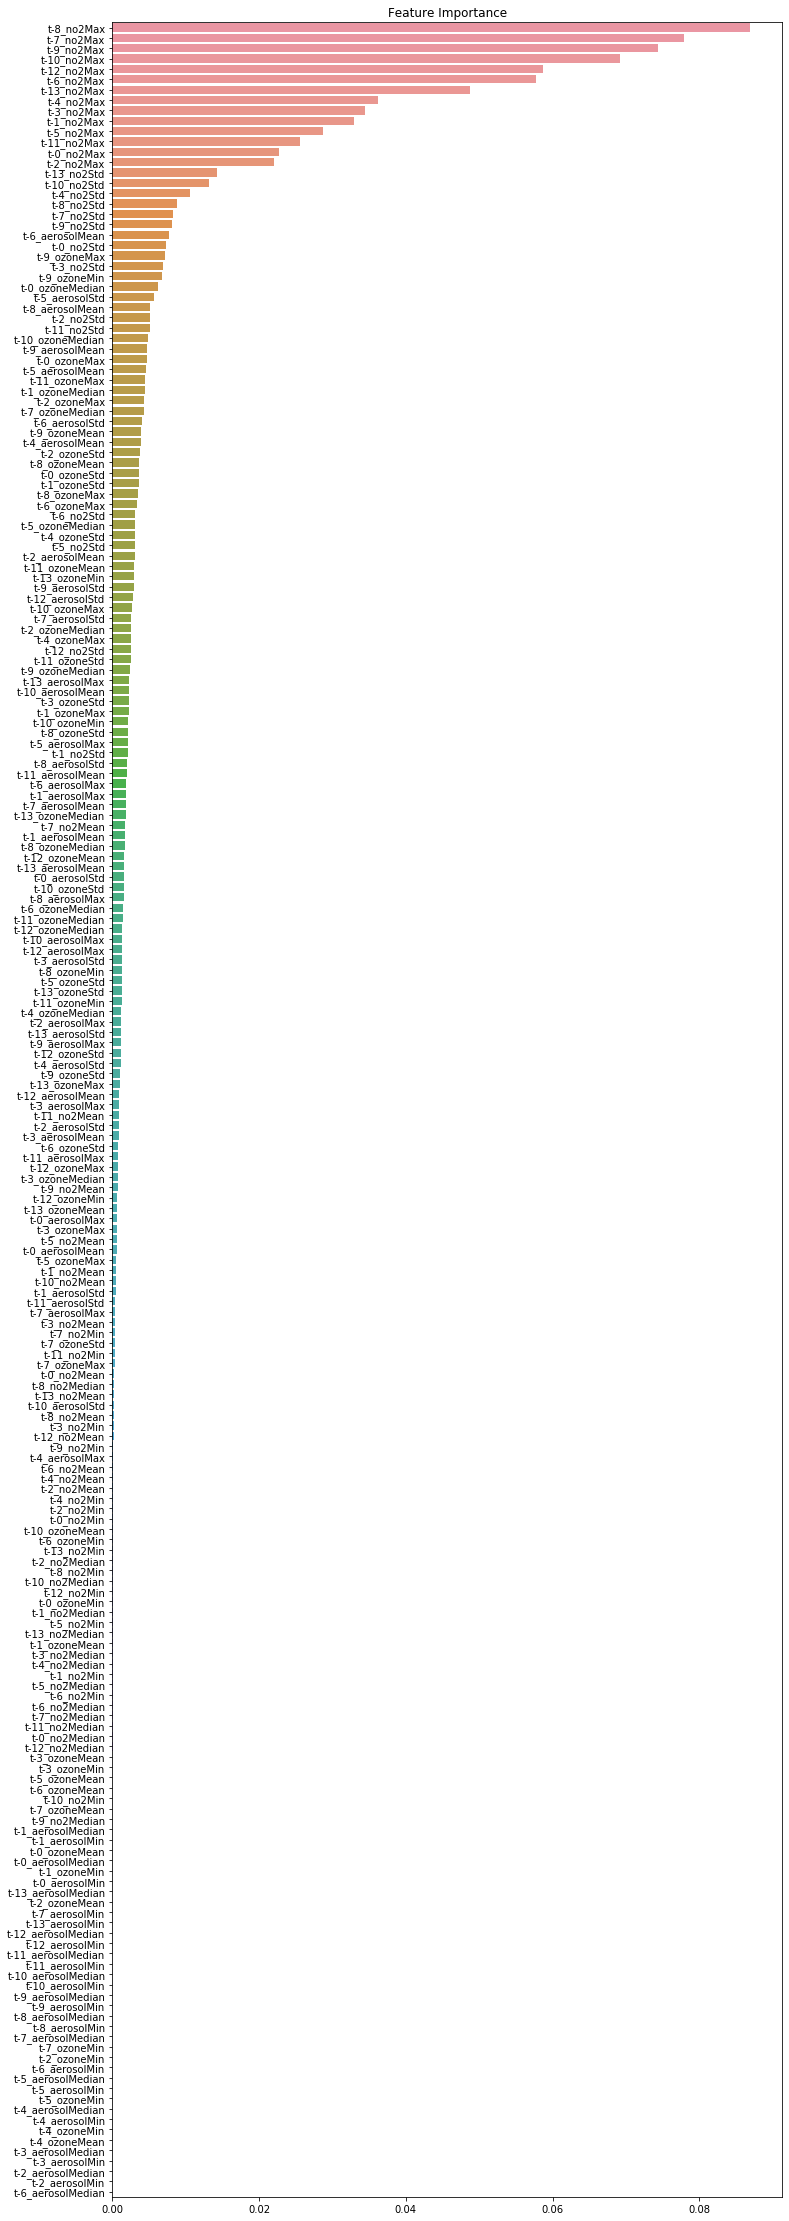

In [32]:
plot_feature_importances(model.feature_importances_, df_train_classical.drop('y', axis=1).columns)